# Sentiment Analysis
- Use summarized S-1 raw filings
- Add Sentimnet Analysis features
 - Tokenize sentences
 - Use positive and negative sentences

In [1]:
#core
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd

import glob
import nasdaq
import ml
from pathlib import Path

#NLP
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load Previous Dataset

In [2]:
#load and sort by date priced
df = pd.read_csv('../Datasets/2 sentiment analysis.csv', index_col='Symbol')
df = df[list(df.columns.drop(['1D', '1W', '1M', '3M'])) + ['1D', '1W', '1M', '3M']]

# Integrating IPO Summaries

In [3]:
def get_sentiment_df(text):
    '''returns Sentiment Analysis'''
    sid = SentimentIntensityAnalyzer()
    ps_list = []
    sentences = sent_tokenize(text)
    
    for sentence in sentences:
        ps = sid.polarity_scores(sentence)
        ps['sent'] = sentence
        ps_list.append(ps)
    
    df = pd.DataFrame(ps_list)

    return df

In [4]:
def add_sentiment_features(df_sentiment, symbol):
    '''Adds Sentiment Snalysis features, returns DataFrame'''
    
    #filter frames
    df_tmp = pd.DataFrame()

    #sentences features
    df_tmp.at[symbol, 'Summary Mean Sent Len'] = df_sentiment['sent'].str.len().mean()
    df_tmp.at[symbol, 'Summary Sent Count'] = df_sentiment.shape[0]

    #sentiment
    df_sentiment = df_sentiment[['compound', 'neg', 'neu', 'pos']]
    df_tmp = pd.concat([pd.DataFrame(df_sentiment.mean(), columns=[symbol]).T.add_prefix('Summary Signal '), df_tmp], axis=1)
    
    return df_tmp

In [5]:
#add sentiment features
df_sentiment_features = pd.DataFrame()
counter = 0    

for x in df.index:
    try:
        counter += 1
        print('\n( ' + str(counter) + ' / ' + str(df.shape[0]) + ' ) ' + x)

        #check if summary is available
        file_name = "../Summary/" + x + ".txt"
        if Path(file_name).is_file():
            #load data
            with open(file_name, "r", encoding="utf-8") as file:
                text = file.read()

                #get sentiment
                df_sentiment = get_sentiment_df(text)
                df_sentiment_features = pd.concat([df_sentiment_features, add_sentiment_features(df_sentiment, x)], axis=0)
        else:
            print('no S-1 summary for ', x)
    except Exception as e:
        print(x, e)


( 1 / 996 ) AACC

( 2 / 996 ) AAT

( 3 / 996 ) ABLX
no S-1 summary for  ABLX

( 4 / 996 ) ABR

( 5 / 996 ) ABTX

( 6 / 996 ) ACAD

( 7 / 996 ) ACFC

( 8 / 996 ) ACIA

( 9 / 996 ) ACIU
no S-1 summary for  ACIU

( 10 / 996 ) ACLS
no S-1 summary for  ACLS

( 11 / 996 ) ACLZ
no S-1 summary for  ACLZ

( 12 / 996 ) ACM
no S-1 summary for  ACM

( 13 / 996 ) ACMR

( 14 / 996 ) ACN
no S-1 summary for  ACN

( 15 / 996 ) ACOR

( 16 / 996 ) ACRX

( 17 / 996 ) ACUS

( 18 / 996 ) ADAP
no S-1 summary for  ADAP

( 19 / 996 ) ADMS

( 20 / 996 ) ADOM

( 21 / 996 ) ADRO

( 22 / 996 ) ADSW

( 23 / 996 ) ADT

( 24 / 996 ) ADUS

( 25 / 996 ) AEL

( 26 / 996 ) AER
no S-1 summary for  AER

( 27 / 996 ) AERI

( 28 / 996 ) AFFY

( 29 / 996 ) AFH

( 30 / 996 ) AIMC

( 31 / 996 ) AIMT

( 32 / 996 ) AIZ

( 33 / 996 ) AJX

( 34 / 996 ) AKAO

( 35 / 996 ) AKBA

( 36 / 996 ) AKER

( 37 / 996 ) AL

( 38 / 996 ) ALDR

( 39 / 996 ) ALDX

( 40 / 996 ) ALGRU
no S-1 summary for  ALGRU

( 41 / 996 ) ALGT

( 42 / 996 ) ALLT


( 314 / 996 ) EVTC

( 315 / 996 ) EYE

( 316 / 996 ) EYEN

( 317 / 996 ) FAMI
no S-1 summary for  FAMI

( 318 / 996 ) FAT
no S-1 summary for  FAT

( 319 / 996 ) FBM

( 320 / 996 ) FCB

( 321 / 996 ) FELP

( 322 / 996 ) FET

( 323 / 996 ) FEYE

( 324 / 996 ) FFHL
no S-1 summary for  FFHL

( 325 / 996 ) FGEN

( 326 / 996 ) FIXX

( 327 / 996 ) FMCN
no S-1 summary for  FMCN

( 328 / 996 ) FMI

( 329 / 996 ) FMSA

( 330 / 996 ) FN

( 331 / 996 ) FND

( 332 / 996 ) FNGN

( 333 / 996 ) FOLD

( 334 / 996 ) FOMX
no S-1 summary for  FOMX

( 335 / 996 ) FORK
no S-1 summary for  FORK

( 336 / 996 ) FORM

( 337 / 996 ) FOXF

( 338 / 996 ) FPACU
no S-1 summary for  FPACU

( 339 / 996 ) FPI

( 340 / 996 ) FPRX

( 341 / 996 ) FRAC

( 342 / 996 ) FRAN

( 343 / 996 ) FRPT

( 344 / 996 ) FRSH

( 345 / 996 ) FRTA

( 346 / 996 ) FSAM

( 347 / 996 ) FSBW

( 348 / 996 ) FSLR

( 349 / 996 ) FTSI

( 350 / 996 ) FTSV
no S-1 summary for  FTSV

( 351 / 996 ) GASS
no S-1 summary for  GASS

( 352 / 996 ) GBIM

( 3


( 619 / 996 ) OAK

( 620 / 996 ) OAS

( 621 / 996 ) OASM
no S-1 summary for  OASM

( 622 / 996 ) OBLN

( 623 / 996 ) OBSV
no S-1 summary for  OBSV

( 624 / 996 ) OC

( 625 / 996 ) OCIP
no S-1 summary for  OCIP

( 626 / 996 ) OCUL

( 627 / 996 ) OEC
no S-1 summary for  OEC

( 628 / 996 ) OFSI

( 629 / 996 ) OIS

( 630 / 996 ) OKTA

( 631 / 996 ) OLLI

( 632 / 996 ) OMAB
no S-1 summary for  OMAB

( 633 / 996 ) OMED

( 634 / 996 ) OMER

( 635 / 996 ) OMPI

( 636 / 996 ) ONCE

( 637 / 996 ) ONDK

( 638 / 996 ) ONE

( 639 / 996 ) ONTX

( 640 / 996 ) OPESU

( 641 / 996 ) OPGN

( 642 / 996 ) OPHT

( 643 / 996 ) OPTN

( 644 / 996 ) OPTR

( 645 / 996 ) OPTT

( 646 / 996 ) ORA
no S-1 summary for  ORA

( 647 / 996 ) ORC

( 648 / 996 ) ORIT

( 649 / 996 ) ORPN
no S-1 summary for  ORPN

( 650 / 996 ) OSN
no S-1 summary for  OSN

( 651 / 996 ) OSTK

( 652 / 996 ) OTIC

( 653 / 996 ) OTIV
no S-1 summary for  OTIV

( 654 / 996 ) OTT

( 655 / 996 ) OUNZ

( 656 / 996 ) OVID

( 657 / 996 ) OXFD

( 658 /


( 926 / 996 ) VIRT

( 927 / 996 ) VIT
no S-1 summary for  VIT

( 928 / 996 ) VJET
no S-1 summary for  VJET

( 929 / 996 ) VLP

( 930 / 996 ) VLRS
no S-1 summary for  VLRS

( 931 / 996 ) VLTR

( 932 / 996 ) VNCE

( 933 / 996 ) VNDA

( 934 / 996 ) VNET
no S-1 summary for  VNET

( 935 / 996 ) VNOM

( 936 / 996 ) VRA

( 937 / 996 ) VRCA
no S-1 summary for  VRCA

( 938 / 996 ) VRNA
no S-1 summary for  VRNA

( 939 / 996 ) VRNS

( 940 / 996 ) VRNT

( 941 / 996 ) VRSK

( 942 / 996 ) VRTU

( 943 / 996 ) VSAR

( 944 / 996 ) VSI

( 945 / 996 ) VSLR

( 946 / 996 ) VSTM

( 947 / 996 ) VTL

( 948 / 996 ) VTVT

( 949 / 996 ) VVV
no S-1 summary for  VVV

( 950 / 996 ) VYGR

( 951 / 996 ) W

( 952 / 996 ) WAAS

( 953 / 996 ) WATT

( 954 / 996 ) WBAI
no S-1 summary for  WBAI

( 955 / 996 ) WBSN
no S-1 summary for  WBSN

( 956 / 996 ) WCG

( 957 / 996 ) WD

( 958 / 996 ) WDAY

( 959 / 996 ) WEAT

( 960 / 996 ) WES

( 961 / 996 ) WHD

( 962 / 996 ) WHLR

( 963 / 996 ) WIFI

( 964 / 996 ) WING

( 965 / 99

In [6]:
#combine original data with sentiment features
df1 = pd.concat([df_sentiment_features, df], axis=1)

In [7]:
#save for later improvements
df1.to_csv('../Datasets/3 summarization.csv', index=True, index_label='Symbol')

df1 = pd.read_csv('../Datasets/3 summarization.csv', index_col='Symbol')

In [8]:
df1.head()

,Summary Signal compound,Summary Signal neg,Summary Signal neu,Summary Signal pos,Summary Mean Sent Len,Summary Sent Count,Neg Sent Signal compound,Neg Sent Signal neg,Neg Sent Signal neu,Neg Sent Signal pos,...,MKT13,Name Words,Name Length,Offer Amount,Price,Shares,1D,1W,1M,3M
AACC,0.348637,0.180500,0.748500,0.071000,1273.375000,8.0,-0.378244,0.245297,0.696109,0.058594,...,0,4,29,105000000.0,15.0,7000000,0.002401,0.026411,0.073229,0.121248
AAT,0.805200,0.062500,0.816750,0.120500,2191.250000,4.0,-0.411369,0.206367,0.721410,0.072330,...,0,4,27,563750000.0,20.5,27500000,-0.017185,-0.010683,-0.019508,-0.008825
ABLX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,2,9,200025000.0,17.5,11430000,0.170308,0.161345,0.314286,1.438095
ABR,0.575150,0.008375,0.861125,0.130375,1571.750000,8.0,-0.238452,0.203779,0.705992,0.090164,...,0,4,22,125450000.0,20.0,6272500,0.022444,-0.030923,-0.022444,-0.003990
ABTX,0.976933,0.059000,0.813333,0.127667,3917.333333,3.0,-0.413446,0.225718,0.698177,0.076137,...,0,3,27,54600000.0,21.0,2600000,0.027938,-0.008869,0.054989,0.004878


In [9]:
#quarter and month
months = df1.loc[:, 'Q1':'MKT12'].columns
classes = df1.loc[:, '1D':'3M'].columns
others = df1.columns.difference(months).difference(classes)

#standardize
df1 = pd.concat([ml.standardize(df1[others]), df1[months], df1[classes]], axis=1)

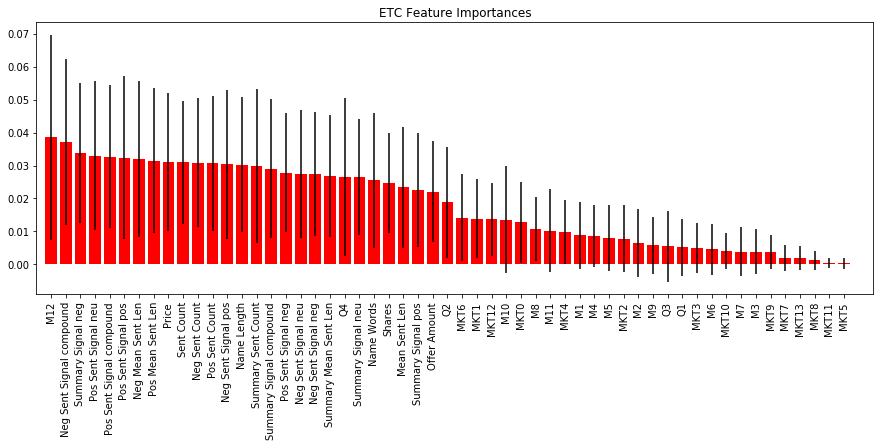

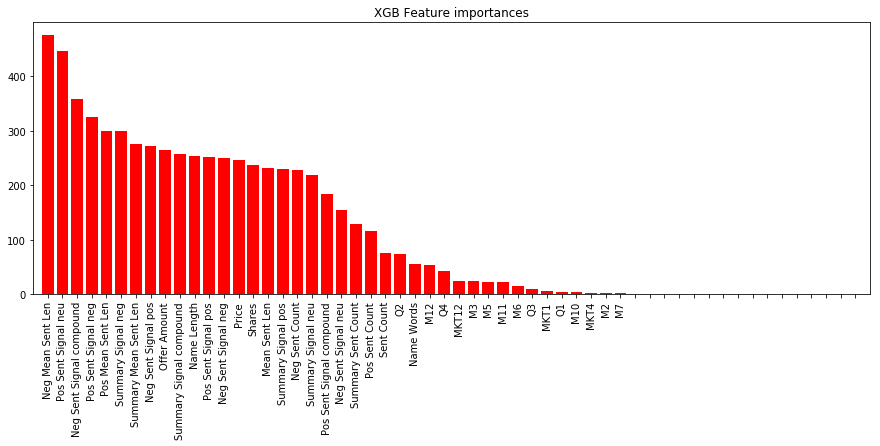

In [10]:
#feature importance
indices = ml.show_feature_importance(df1, '3M')

In [11]:
#feature selection
df1 = ml.select_features(indices.shape[0], indices, df1)

['Neg Mean Sent Len', 'Neg Sent Signal compound', 'Pos Mean Sent Len', 'Pos Sent Signal compound', 'Pos Sent Signal neg', 'Pos Sent Signal neu', 'Summary Signal neg', 'M12']


C:\Users\Void\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


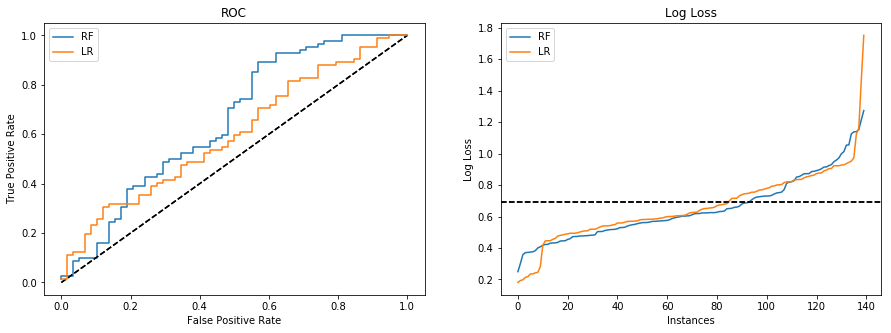

1D        1W        1M        3M
AUC      LR  0.530908  0.530908  0.530908  0.530908
         RF  0.599874  0.599874  0.599874  0.599874
f1       LR  0.744186  0.744186  0.744186  0.744186
         RF  0.772947  0.772947  0.772947  0.772947
log loss LR  0.659938  0.659938  0.659938  0.659938
         RF   0.65094   0.65094   0.65094   0.65094

In [12]:
#now run ML flow with sentiment features for summaries
ml.run_ml_flow(df1)